In [1]:
#Mall Customer Segmentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Accessing the dataset

In [2]:
customer=pd.read_csv('Mall_Customers.csv')

In [3]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Preprocessing

In [6]:
customer=customer.drop(['CustomerID'],axis=1)
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
#CONVERTING CATEGORICAL TO NUMERIC
cust=pd.get_dummies(customer)
cust

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [8]:
#Standardisation of features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(cust)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [9]:
#Converting to dataframe
X=pd.DataFrame(X,columns=cust.columns)
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


In [11]:
#dimensionality reduction using TSNE
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=100)
type(tsne)#2 is dim not clusters


sklearn.manifold._t_sne.TSNE

In [12]:
X_tsne=tsne.fit_transform(X)

C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
X_tsne

array([[ 13.742989 , -10.150426 ],
       [ 14.02748  ,  -8.550854 ],
       [-10.936391 ,   3.5889792],
       [ -8.2719145,   7.8462076],
       [-11.331948 ,   4.896708 ],
       [ -8.388392 ,   7.9244766],
       [-11.59382  ,   3.1148205],
       [ -7.8547893,   8.482502 ],
       [ 13.784817 , -14.67874  ],
       [ -8.590201 ,   7.4308343],
       [ 13.600574 , -14.865328 ],
       [ -7.3235292,   8.178741 ],
       [-13.269284 ,   1.8991803],
       [ -8.454644 ,   7.977522 ],
       [ 13.482756 , -12.509849 ],
       [ 13.834272 ,  -8.55989  ],
       [-11.744753 ,   4.4423738],
       [ 13.643496 ,  -9.113793 ],
       [ 13.063439 , -13.698295 ],
       [ -7.3385396,   8.1984005],
       [ 13.1889925, -11.681824 ],
       [ 13.421404 ,  -8.824541 ],
       [-12.442577 ,   2.4455643],
       [ 13.333221 ,  -9.116437 ],
       [-13.137483 ,   2.1783068],
       [ 13.420705 ,  -8.440628 ],
       [-13.083287 ,   3.4043512],
       [ 12.964891 ,  -9.925661 ],
       [-12.49134  ,

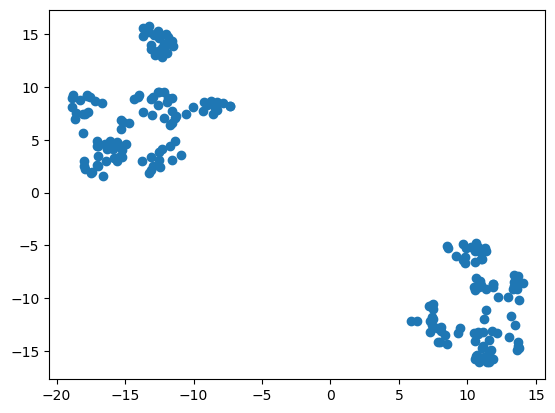

In [14]:
#Visualisation
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

In [15]:
### Findings:
#1. Formation of clusters
#2. Properly separated 2 clusters

In [17]:
#Clustering using GMM
from sklearn.mixture import GaussianMixture
n_comps=np.arange(1,20,1)
aic_score=[]
bic_score=[]
for n in n_comps:
    model=GaussianMixture(n_components=n,random_state=10,n_init=5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))

C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

In [18]:
print(aic_score)

[28.980337349201807, -2766.4799897414314, -2796.645539935852, -2814.9954736260534, -2827.841837753307, -2858.7205911373117, -2860.811115140883, -2847.191390254745, -2843.1042774355687, -2824.911193879629, -2833.7984953177297, -2825.7254751146584, -2824.9723143900333, -2809.280920229898, -2748.2451958535935, -2737.979046967215, -2770.5300715477647, -2765.822614353248, -2736.0128727680512]


In [19]:
print(bic_score)

[94.94668468016253, -2631.2489777129617, -2592.1498632098737, -2541.235132202566, -2484.8168316323113, -2446.4309203188072, -2379.2567796248695, -2296.372390041223, -2223.0206125245377, -2135.5628642710894, -2075.1855010116815, -1997.8478161111013, -1927.8299906889674, -1842.8739318313235, -1712.57354275751, -1633.0427291736225, -1596.3290890566639, -1522.3569671646383, -1423.2825608819326]


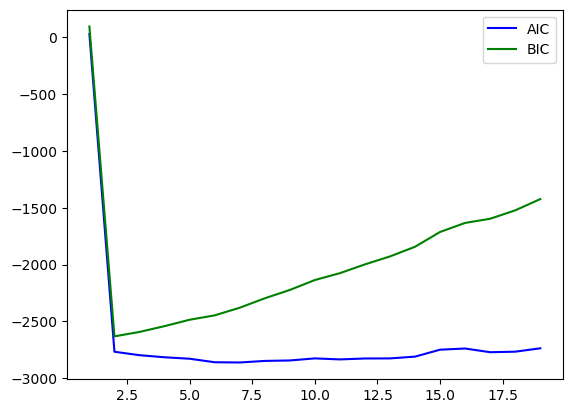

In [21]:
plt.plot(n_comps,aic_score,c='b',label='AIC')
plt.plot(n_comps,bic_score,c='g',label='BIC')
plt.legend();


In [22]:
#Findings:
#No of clusters=2
#Building GM model with 2 clusters
gm=GaussianMixture(n_components=2,random_state=100,n_init=5)

In [23]:
gm.fit(X)

GaussianMixture(n_components=2, n_init=5, random_state=100)

In [24]:
pred=gm.predict(X)

In [25]:
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [26]:
gm.means_#5 features

array([[ 0.06866767,  0.06363885, -0.0655555 , -1.12815215,  1.12815215],
       [-0.05395317, -0.05000195,  0.05150789,  0.88640526, -0.88640526]])

In [27]:
gm.covariances_

array([[[ 1.22567626e+00, -1.04066272e-01, -3.33359637e-01,
          0.00000000e+00,  0.00000000e+00],
        [-1.04066272e-01,  1.02207728e+00, -2.57837238e-02,
          0.00000000e+00,  0.00000000e+00],
        [-3.33359637e-01, -2.57837238e-02,  1.15955344e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e-06]],

       [[ 8.16068940e-01,  5.34957132e-02, -3.16092284e-01,
          0.00000000e+00,  0.00000000e+00],
        [ 5.34957132e-02,  9.76973092e-01,  4.37956955e-02,
         -2.81736038e-32,  0.00000000e+00],
        [-3.16092284e-01,  4.37956955e-02,  8.68608681e-01,
         -5.28255070e-33,  0.00000000e+00],
        [ 0.00000000e+00, -2.81736038e-32, -5.28255070e-33,
          1.00000000e-06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
  

In [28]:
gm.weights_

array([0.44, 0.56])

In [29]:
#Adding Label columns to the dataframe
customer['Label']=pred

In [30]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [31]:
#Insights:
customer['Label'].value_counts()

1    112
0     88
Name: Label, dtype: int64

In [32]:
customer['Label'].value_counts()/sum(customer['Label'].value_counts())

1    0.56
0    0.44
Name: Label, dtype: float64

In [33]:
customer[customer['Gender']=='Male']

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [35]:
customer[customer['Gender']=='Male'][customer['Label']==0]

C:\Users\Rudrani\AppData\Local\Temp\ipykernel_22088\2853060918.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender']=='Male'][customer['Label']==0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [36]:
#1.All males form a market segment constituting 44% of the customer base

In [37]:
customer[customer['Gender']=='Female'][customer['Label']==1]

C:\Users\Rudrani\AppData\Local\Temp\ipykernel_22088\778459031.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender']=='Female'][customer['Label']==1]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
5,Female,22,17,76,1
6,Female,35,18,6,1
...,...,...,...,...,...
191,Female,32,103,69,1
193,Female,38,113,91,1
194,Female,47,120,16,1
195,Female,35,120,79,1


In [38]:
#1.All females form a market segment constituting 56% of the customer base

In [39]:
#Forming samples
gm.sample(10000)

(array([[-0.48030421,  0.82947775,  1.35126332, -1.12793097,  1.12866637],
        [ 1.16826019,  0.17668898, -0.857043  , -1.12771699,  1.12769412],
        [ 1.15541312, -0.53360973,  0.17702385, -1.12868343,  1.12804774],
        ...,
        [-0.72225881,  0.08541431,  0.89346945,  0.8864895 , -0.88654587],
        [ 0.22157311, -0.21648202, -1.40252937,  0.88543931, -0.88553845],
        [ 0.44325619,  0.15695807, -0.86917668,  0.88626531, -0.88554246]]),
 array([0, 0, 0, ..., 1, 1, 1]))